<a href="https://colab.research.google.com/github/igornunespatricio/house-prices-advanced-regression-techniques/blob/main/base_model_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing and importing libraries and downloading the dataset

In [3]:
# run if you are in colab
#!pip install opendatasets >/dev/null

In [1]:
import opendatasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Before running this code, make sure to upload your kaggle.json file here, otherwise it will return an error.
opendatasets.download('https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques')

100%|██████████| 199k/199k [00:00<00:00, 250kB/s]


Extracting archive .\house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques.zip to .\house-prices-advanced-regression-techniques


# Reading the database

In [8]:
# Reading the database
train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [9]:
# check the first rows of the database
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
# this gives us the name of the columns, how many non null values in each column and the data type of each column
# this is important to understand the database and see which columns can be used in with the machine learning algorithm ,
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Baseline Model

The baseline model will be used to compare improvements of other models.

In the baseline model the only steps will remove columns with more than 10% null values and them from this resulting database, remove columns with non numeric value types.

In [58]:
# dropping columns with too many null values
columns_to_drop = train.columns[train.isnull().sum()/train.shape[0] > 0.1]
train_bm = train.drop(columns_to_drop, axis=1)

In [59]:
# Filling the null values with -1 is a common way to say that the information didn't exist before. this can only be done when no features/columns have negative numbers, which is the case of this database.
train_bm = train_bm.fillna(-1)

In [60]:
# Keeping only numeric features/columns
numeric_cols = train_bm.select_dtypes(include=np.number).columns
train_bm = train_bm[numeric_cols]

In [19]:
# x are the features and y is the target column for prediction
x = train_bm.drop('SalePrice', axis=1)
y = train_bm.SalePrice

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [26]:
# Linear Regression
linearReg = LinearRegression()  # creating the instance of the linear regression object
linearReg.fit(x_train, y_train)  # fitting the model in the train data
predLinearReg = linearReg.predict(x_test)  # predictions of the fitted model in the test data

In [27]:
# Decision Tree Regressor
treeReg = DecisionTreeRegressor(random_state=0)  # create the instance of the decision tree regressor
treeReg.fit(x_train, y_train)  # fitting the decision tree with train data
predTreeReg = treeReg.predict(x_test)  # predicting the sales price with the test data

In [30]:
# K-Neraest Neighbors - KNN
KNNReg = KNeighborsRegressor(n_neighbors=2)  # creates the KNN instance
KNNReg.fit(x_train, y_train)  # fits to the train data
predKNNReg = KNNReg.predict(x_test)  # predicts on the test data

In [32]:
print('Linear Regression Error')
print(f'MSE: {mean_squared_error(y_test, predLinearReg)}')
print(f'MAE: {mean_absolute_error(y_test, predLinearReg)}')

Linear Regression Error
MSE: 1533982883.4449246
MAE: 23763.187393064683


In [33]:
print('Decision Tree Regressor Error')
print(f'MSE: {mean_squared_error(y_test, predTreeReg)}')
print(f'MAE: {mean_absolute_error(y_test, predTreeReg)}')

Decision Tree Regressor Error
MSE: 2137542662.9937758
MAE: 27160.603734439836


In [35]:
print('KNN Regression Error')
print(f'MSE: {mean_squared_error(y_test, predKNNReg)}')
print(f'MAE: {mean_absolute_error(y_test, predKNNReg)}')

KNN Regression Error
MSE: 2733937586.841286
MAE: 33273.08298755187


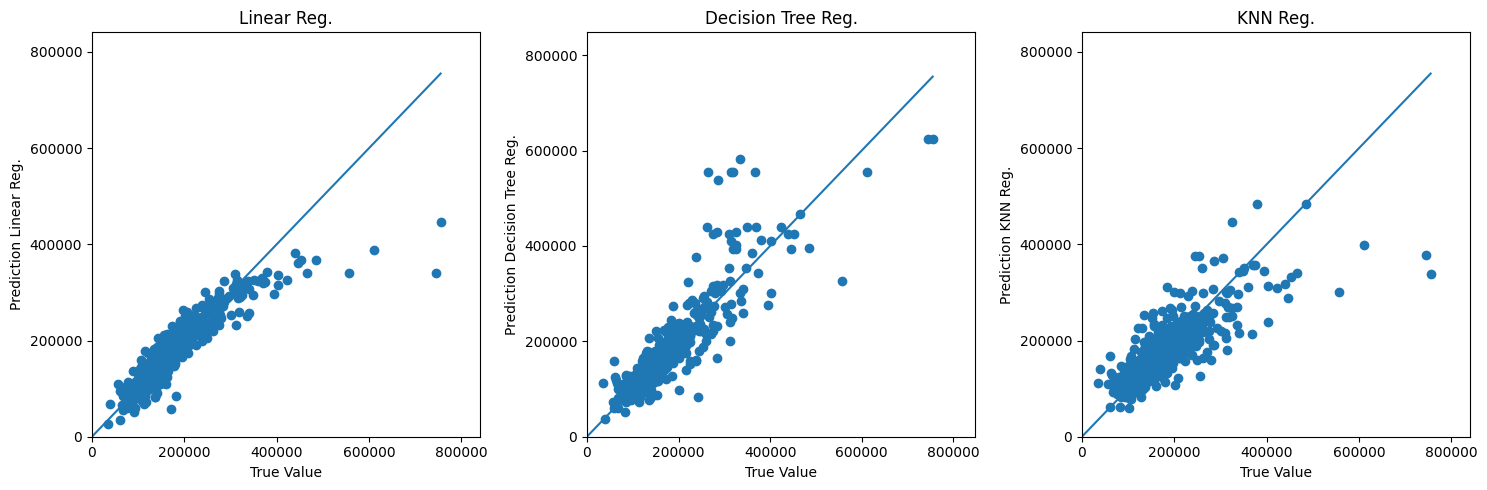

In [113]:
# plot with the relationship between predictions and true value from test data
# the more linear, the more correct is our prediction (this means that prediction = test, the best scenario)
fig, axs = plt.subplots(ncols=3, figsize=(15,5), tight_layout=True)
max_y_test = max(y_test)
std_y_test = np.std(y_test)
for ax, pred, model in zip(axs, [predLinearReg, predTreeReg, predKNNReg], ['Linear Reg.', 'Decision Tree Reg.', 'KNN Reg.']):
    max_pred = max(pred)
    std_pred = np.std(pred)
    max_pred_test = max(max_y_test, max_pred)
    max_std_test_pred = max(std_y_test, std_pred)
    ax.scatter(y_test, pred)
    ax.plot([0, max_pred_test],[0, max_pred_test])
    ax.set(xlim=(0, max_pred_test + max_std_test_pred), ylim=(0, max_pred_test + max_std_test_pred), title=model, xlabel='True Value', ylabel=f'Prediction {model}')
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.show()

In [73]:
# test database
test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [74]:
# We need to remove the same columns that we removed from the training dataset so we can run the predictions
test_bm = test.drop(columns_to_drop, axis=1)

In [75]:
# we also need to return only the numeric columns same way as we did in the training
# we basically need to have the same columns that we passed to the model when training
test_bm = test_bm[numeric_cols.drop('SalePrice')]

In [76]:
# we also need to change null values to -1 as we did in training
test_bm = test_bm.fillna(-1)

In [77]:
# predictions with the linear regression
testPredLinearReg = linearReg.predict(test_bm)

In [78]:
# predictions with the decision tree regressor
testPredTreeReg = treeReg.predict(test_bm)

In [79]:
# predictions with the knn regressor
testPredKNNReg = KNNReg.predict(test_bm)

In [85]:
# manipulating the data accordingly to kaggle competition requests (Id and prediction only)
test_bm_kaggle = test[['Id']].copy()
test_bm_kaggle['SalePrice'] = testPredLinearReg

In [88]:
# checking number of rows (according to kaggle, it should have 1459 rows)
test_bm_kaggle.shape

(1459, 2)

In [87]:
test_bm_kaggle.to_csv('bm_linear_reg.csv', index=False)

In [89]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f /content/bm_linear_reg.csv -m "First submission, base model, linear regression"

100% 33.6k/33.6k [00:00<00:00, 79.1kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques